# Red Wine Quality Analysis

## 데이터 설명 (Data Description)

이 데이터셋은 포르투갈 "Vinho Verde" 와인의 레드 와인 변형에 대한 데이터입니다. Kaggle 및 UCI Machine Learning Repository에서 제공됩니다.

### 특징 (Features)
1. **fixed acidity** (고정 산도)
2. **volatile acidity** (휘발성 산도)
3. **citric acid** (구연산)
4. **residual sugar** (잔여 당분)
5. **chlorides** (염화물)
6. **free sulfur dioxide** (유리 이산화황)
7. **total sulfur dioxide** (총 이산화황)
8. **density** (밀도)
9. **pH**
10. **sulphates** (황산염)
11. **alcohol** (알코올)

### 타겟 (Target)
12. **quality** (품질): 0~10 점수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

file_path = 'data/winequality-red.csv'

if not os.path.exists(file_path):
    try:
        import urllib.request
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
        os.makedirs('data', exist_ok=True)
        print("Downloading data...")
        urllib.request.urlretrieve(url, file_path)
        print("Download complete.")
    except Exception as e:
        print(f"Download failed: {e}")

# 구분자 확인
try:
    wine_df = pd.read_csv(file_path, sep=';')
except:
    wine_df = pd.read_csv(file_path)

wine_df.head()

Download complete.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. EDA & Visualization

In [2]:
wine_df.info()
display(wine_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


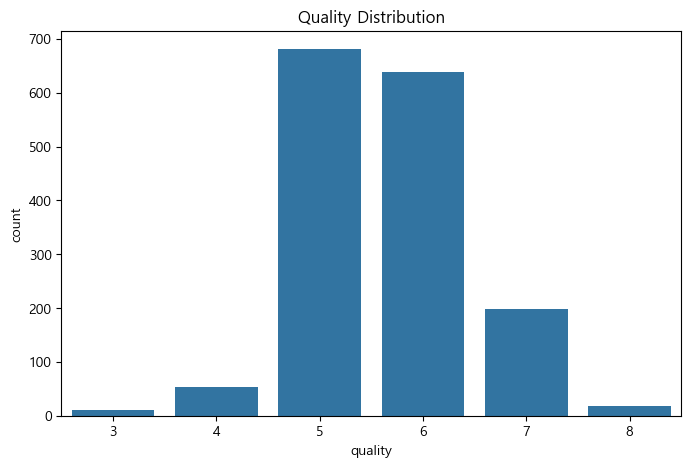

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine_df)
plt.title('Quality Distribution')
plt.show()

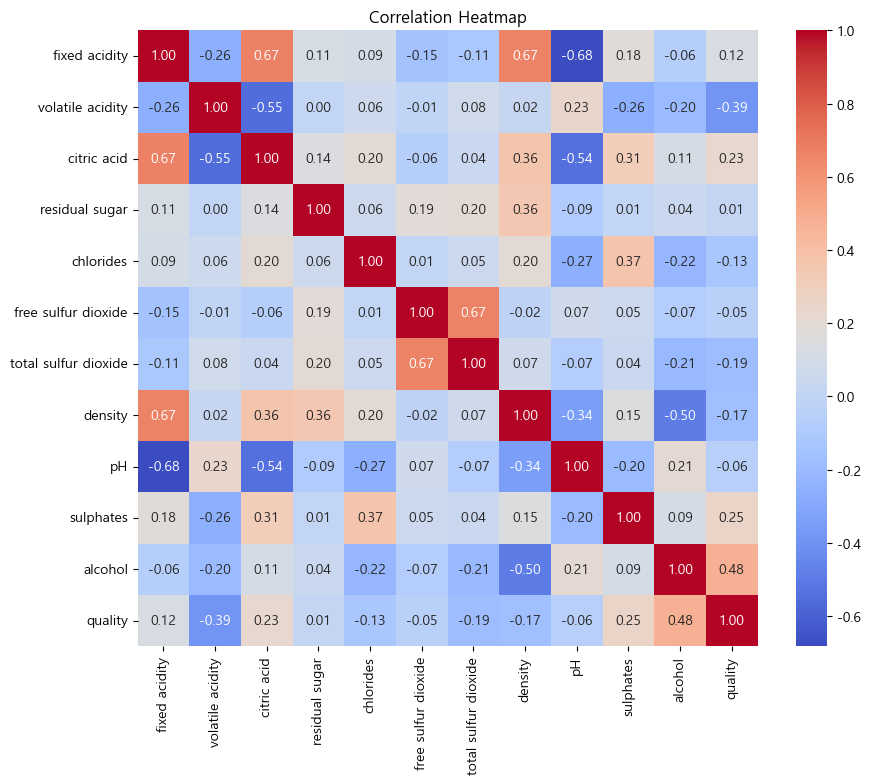

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

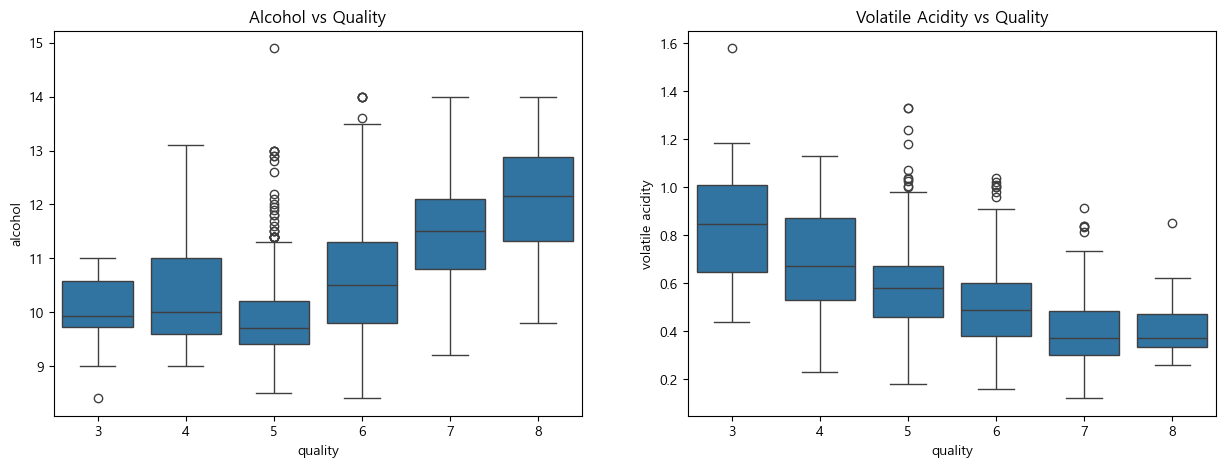

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='quality', y='alcohol', data=wine_df, ax=axes[0])
axes[0].set_title('Alcohol vs Quality')
sns.boxplot(x='quality', y='volatile acidity', data=wine_df, ax=axes[1])
axes[1].set_title('Volatile Acidity vs Quality')
plt.show()

## 2. Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train Set:", X_train_scaled.shape)
print("Test Set:", X_test_scaled.shape)

Train Set: (1279, 11)
Test Set: (320, 11)


## 3. Modeling (6 Models)

6가지 모델을 사용하여 성능을 비교합니다.
1. Logistic Regression
2. SVC
3. Random Forest
4. KNN
5. Decision Tree
6. Gradient Boosting

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

results = {}

print("모델별 Cross-Validation (cv=5) 정확도 평균:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

모델별 Cross-Validation (cv=5) 정확도 평균:
LogisticRegression: 0.5973
SVC: 0.6255
RandomForest: 0.6771
KNN: 0.5661
DecisionTree: 0.5895
GradientBoosting: 0.6544


## 4. Ensemble & Hyperparameter Tuning

성능이 좋은 상위 4개 모델을 선택하여 앙상블(VotingClassifier) 모델을 생성하고, GridSearchCV를 통해 하이퍼파라미터를 튜닝합니다.

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# 상위 4개 모델 선정
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)
top_4_names = [name for name, score in sorted_models[:4]]
print(f"선정된 상위 4개 모델: {top_4_names}")

estimators = [(name, models[name]) for name in top_4_names]

# 앙상블 모델 생성 (Soft Voting)
ensemble = VotingClassifier(estimators=estimators, voting='soft')

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 예시
# 포함된 모델에 따라 파라미터 이름을 동적으로 조정해야 하지만, 여기서는 일반적인 예시를 사용합니다.
# 실제 튜닝 시간을 고려하여 범위를 제한적으로 설정합니다.
params = {}

if 'SVC' in top_4_names:
    params['SVC__C'] = [1, 10]
    params['SVC__kernel'] = ['rbf']
if 'RandomForest' in top_4_names:
    params['RandomForest__n_estimators'] = [100, 200]
if 'KNN' in top_4_names:
    params['KNN__n_neighbors'] = [3, 5, 7]
if 'GradientBoosting' in top_4_names:
    params['GradientBoosting__n_estimators'] = [100, 200]
    params['GradientBoosting__learning_rate'] = [0.05, 0.1]

print("튜닝할 파라미터:", params.keys())

grid = GridSearchCV(ensemble, param_grid=params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("최적 파라미터:", grid.best_params_)
print("최고 CV 점수:", grid.best_score_)

best_model = grid.best_estimator_

선정된 상위 4개 모델: ['RandomForest', 'GradientBoosting', 'SVC', 'LogisticRegression']
튜닝할 파라미터: dict_keys(['SVC__C', 'SVC__kernel', 'RandomForest__n_estimators', 'GradientBoosting__n_estimators', 'GradientBoosting__learning_rate'])
Fitting 3 folds for each of 16 candidates, totalling 48 fits
최적 파라미터: {'GradientBoosting__learning_rate': 0.1, 'GradientBoosting__n_estimators': 200, 'RandomForest__n_estimators': 200, 'SVC__C': 10, 'SVC__kernel': 'rbf'}
최고 CV 점수: 0.6622412068036635


## 5. Evaluation (평가)

최종 모델을 테스트 세트로 평가합니다.

최종 테스트 정확도: 0.6813

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.75      0.72       136
           6       0.65      0.73      0.69       128
           7       0.76      0.55      0.64        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.43      0.39      0.41       320
weighted avg       0.66      0.68      0.67       320



c:\Users\User\miniconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\miniconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\miniconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


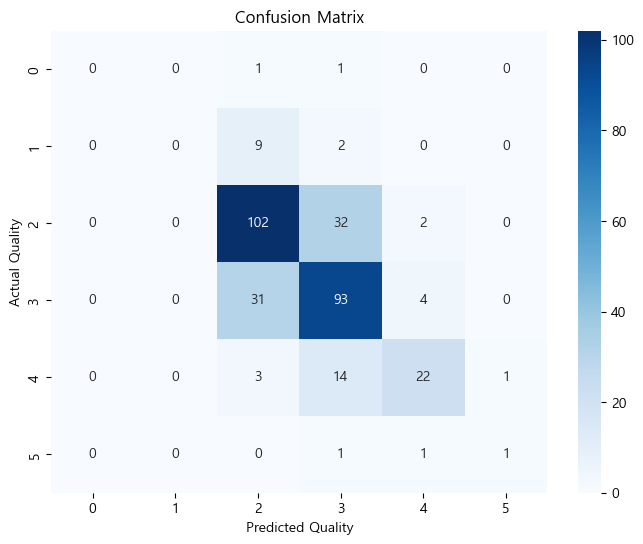

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"최종 테스트 정확도: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Quality')
plt.xlabel('Predicted Quality')
plt.show()